# LSTM 기반의 삼성전자 주가 예측 예제

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

### 0. 데이터 불러오기

In [3]:
raw_df=pd.read_csv('data/005930.KS.csv') # yahoo finance로부터 데이터 다운로드

raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3M,5M
0,2000-01-04,6000,6110,5660,6110,4651.738281,74195000,NaN,NaN
1,2000-01-05,5800,6060,5520,5580,4248.231934,74680000,NaN,NaN
2,2000-01-06,5750,5780,5580,5620,4278.685547,54390000,4392.885254,NaN
3,2000-01-07,5560,5670,5360,5540,4217.779297,40305000,4248.232259,NaN
4,2000-01-10,5600,5770,5580,5770,4392.884277,46880000,4296.449707,4357.863867


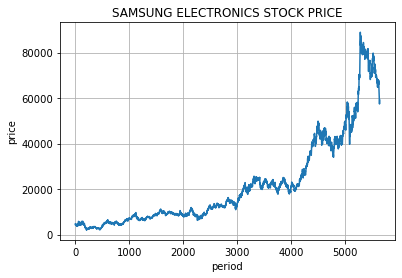

In [4]:
plt.title('SAMSUNG ELECTRONICS STOCK PRICE')
plt.ylabel('price')
plt.xlabel('period')
plt.grid()

plt.plot(raw_df['Adj Close'], label='Adj Close')
plt.show()

### 1. 데이터 전처리(Missing Data 처리, 정규화 등)

In [5]:
# 통계정보 확인
raw_df.describe()

,Open,High,Low,Close,Adj Close,Volume,3M,5M
count,5645.000000,5645.000000,5645.000000,5645.000000,5645.000000,5.645000e+03,5643.000000,5641.000000
mean,25046.563330,25298.256864,24788.434012,25040.931798,21904.105700,2.175597e+07,21900.613050,21897.261358
std,20220.023828,20385.326290,20045.348191,20204.057591,19880.218096,1.542621e+07,19873.709132,19867.803384
min,2540.000000,2760.000000,2420.000000,2730.000000,2078.436768,0.000000e+00,2124.116374,2139.342773
25%,10200.000000,10340.000000,10040.000000,10200.000000,7852.013184,1.180825e+07,7823.954183,7832.583008
50%,16700.000000,16920.000000,16500.000000,16700.000000,13410.835940,1.774472e+07,13365.140950,13392.576760
75%,31700.000000,32260.000000,31440.000000,31840.000000,27068.365230,2.720500e+07,27122.211915,27064.972270
max,90300.000000,96800.000000,89500.000000,91000.000000,88908.179690,1.642150e+08,88354.536460,87892.084380


In [8]:
# Missing Data 확인
raw_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3M           2
5M           4
dtype: int64

In [9]:
# 최소값이 0인 column 체크

for col in raw_df.columns:
    if raw_df[col].min()==0:
        col_name=col
        print(col_name, type(col_name))

Volume <class 'str'>


In [12]:
raw_df.loc[raw_df['Volume']==0]

,Date,Open,High,Low,Close,Adj Close,Volume,3M,5M
23,2000-02-04,5130,5130,5130,5130,3905.633789,0,3936.086833,4021.355811
41,2000-03-01,5120,5120,5120,5120,3898.019043,0,3816.810710,3841.680811
66,2000-04-05,6800,6800,6800,6800,5177.057617,0,5253.190430,5245.577051
72,2000-04-13,6910,6910,6910,6910,5260.803223,0,5309.020834,5393.275293
84,2000-05-01,6000,6000,6000,6000,4567.991211,0,4415.724772,4360.908692
...,...,...,...,...,...,...,...,...,...
5564,2022-02-28,71900,71900,71900,71900,71530.257810,0,71397.609380,72405.731250
5567,2022-03-04,72900,72900,72900,72900,72525.117190,0,72127.174480,71888.407810
5570,2022-03-10,69500,69500,69500,69500,69142.601560,0,69341.572920,70614.990630
5573,2022-03-15,70200,70200,70200,70200,69839.000000,0,69772.677080,69520.646880


In [13]:
# 각 column에 0이 몇개인지 확인

for col in raw_df.columns:
    missing_rows = raw_df.loc[raw_df[col]==0].shape[0]
    print(col+':'+str(missing_rows))

Date:0
Open:0
High:0
Low:0
Close:0
Adj Close:0
Volume:127
3M:0
5M:0


In [14]:
# 먼저 0을 NaN으로 바꾼 후, Missing Date 처리

raw_df['Volume']=raw_df['Volume'].replace(0,np.nan)

# 각 column에 0이 몇개인지 확인
for col in raw_df.columns:
    missing_rows=raw_df.loc[raw_df[col]==0].shape[0]
    print(col+':'+str(missing_rows))

Date:0
Open:0
High:0
Low:0
Close:0
Adj Close:0
Volume:0
3M:0
5M:0


In [16]:
# missing data 확인
raw_df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       127
3M             2
5M             4
dtype: int64

In [17]:
raw_df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume        True
3M            True
5M            True
dtype: bool

In [19]:
raw_df.loc[raw_df['Open'].isna()]

,Date,Open,High,Low,Close,Adj Close,Volume,3M,5M


In [20]:
# missing data 처리

raw_df=raw_df.dropna()

raw_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3M           0
5M           0
dtype: int64

In [23]:
# 정규화 (Data 제외한 모든 수치부분 정규화)

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scale_cols=['Open', 'High', 'Low', 'Close', 'Adj Close', '3M', '5M', 'Volume']

scaled_df=scaler.fit_transform(raw_df[scale_cols])

scaled_df=pd.DataFrame(scaled_df, columns=scale_cols)

print(scaled_df)

          Open      High       Low     Close  Adj Close        3M        5M  \
0     0.034868  0.032008  0.036288  0.034440   0.026655  0.025192  0.025698   
1     0.037375  0.035517  0.038470  0.034440   0.026655  0.025634  0.025094   
2     0.034982  0.031689  0.036518  0.033873   0.026217  0.026163  0.025343   
3     0.034868  0.031689  0.036059  0.033760   0.026129  0.025987  0.025503   
4     0.036235  0.033177  0.037437  0.035120   0.027181  0.026163  0.026018   
...        ...       ...       ...       ...        ...       ...       ...   
5509  0.643345  0.599107  0.633670  0.621615   0.639430  0.651076  0.664183   
5510  0.628532  0.587410  0.624483  0.619350   0.637127  0.646051  0.656019   
5511  0.630811  0.599107  0.634819  0.630679   0.648644  0.645664  0.652753   
5512  0.643345  0.607614  0.641709  0.635210   0.653250  0.650303  0.652986   
5513  0.645624  0.603360  0.649747  0.638609   0.656705  0.656874  0.654386   

        Volume  
0     0.285359  
1     0.363715  


#### 주가 예측을 위해 3M, 5M Adj Close 항목을 feature 선정
- 정답은 Ajd Close
- 시계열 데이터를 위한 window_size=40 설정

In [25]:
# 입력 파라미터 feature, label => numpy type

def make_sequene_dataset(feature, label, window_size):
    feature_list=[]
    label_list=[]
    
    for i in range(len(feature)-window_size):
        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])
        
    return np.array(feature_list), np.array(label_list)

In [27]:
# feature_df, label_df 생성

feature_cols=['3M','5M','Adj Close']
label_cols=['Adj Close']

feature_df=pd.DataFrame(scaled_df, columns=feature_cols)
label_df=pd.DataFrame(scaled_df, columns=label_cols)

In [29]:
feature_df.head()

,3M,5M,Adj Close
0,0.025192,0.025698,0.026655
1,0.025634,0.025094,0.026655
2,0.026163,0.025343,0.026217
3,0.025987,0.025503,0.026129
4,0.026163,0.026018,0.027181


In [30]:
label_df.head()

,Adj Close
0,0.026655
1,0.026655
2,0.026217
3,0.026129
4,0.027181


In [31]:
# DataFrame => Numpy 변환

feature_np=feature_df.to_numpy()
label_np=label_df.to_numpy()

In [36]:
window_size=40

X,Y=make_sequene_dataset(feature_np,label_np,window_size)

print(X.shape, Y.shape)

(5474, 40, 3) (5474, 1)


#### 학습 데이터 테스트 데이터 생성

In [38]:
# train, test 분리

#split= int(len(X)*0.95)
split =-200

x_train=X[0:split]
y_train=Y[0:split]

x_test=X[split:]
y_test=Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5274, 40, 3) (5274, 1)
(200, 40, 3) (200, 1)


#### 모델 구축 및 컴파일

In [46]:
# model 생성

model=Sequential()

model.add(LSTM(128, activation='tanh', input_shape=x_train[0].shape))

model.add(Dense(1, activation='linear'))

In [47]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               67584     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 67,713
Trainable params: 67,713
Non-trainable params: 0
_________________________________________________________________


#### 모델학습 (EarlyStopping 적용)

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss', patience=10)

model.fit(x_train, y_train,
         validation_data=(x_test,y_test),
         epochs=300, batch_size=16,
         callbacks=[early_stop]
         )

Epoch 1/300
330/330 [==============================] - 5s 15ms/step - loss: 3.1025e-05 - mae: 0.0035 - val_loss: 1.7573e-04 - val_mae: 0.0106
Epoch 2/300
330/330 [==============================] - 5s 15ms/step - loss: 3.3738e-05 - mae: 0.0038 - val_loss: 1.9536e-04 - val_mae: 0.0110
Epoch 3/300
330/330 [==============================] - 5s 14ms/step - loss: 3.2698e-05 - mae: 0.0037 - val_loss: 1.4008e-04 - val_mae: 0.0090
Epoch 4/300
330/330 [==============================] - 5s 14ms/step - loss: 3.4291e-05 - mae: 0.0038 - val_loss: 1.3106e-04 - val_mae: 0.0085
Epoch 5/300
330/330 [==============================] - 5s 14ms/step - loss: 3.2515e-05 - mae: 0.0037 - val_loss: 1.2831e-04 - val_mae: 0.0084
Epoch 6/300
330/330 [==============================] - 5s 14ms/step - loss: 3.3831e-05 - mae: 0.0038 - val_loss: 1.3886e-04 - val_mae: 0.0089
Epoch 7/300
330/330 [==============================] - 5s 14ms/step - loss: 3.3672e-05 - mae: 0.0037 - val_loss: 1.2988e-04 - val_mae: 0.0085
Epoch 

In [54]:
pred=model.predict(x_test)
print(pred[0], y_test[0])

7/7 [==============================] - 0s 9ms/step
[0.8452554] [0.82065864]


#### 예측을 총한 정답과의 비교(오차계산 MAPE 사용, 평균절대값백분율오차)

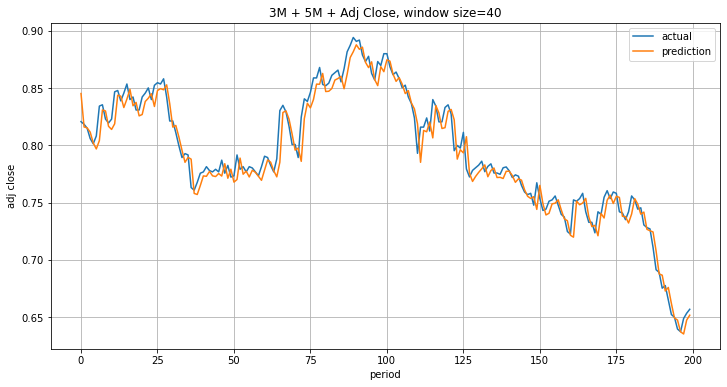

In [56]:
plt.figure(figsize=(12,6))
plt.title('3M + 5M + Adj Close, window size=40')
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [57]:
# 평균절대값백분율오차계산(MAPE)

print(np.sum(abs(y_test-pred)/y_test)/len(x_test))

0.010730034481648823
